# Robberies in Boston

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
#from statsmodels.tools.eval_measures import rmspe, rmse
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from statsmodels.tsa.arima_process import ArmaProcess
from pmdarima.arima import CHTest


import warnings
warnings.filterwarnings('ignore')

In [3]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/monthly-robberies.csv')

df = pd.read_csv(url1)

df

,Month,Robberies
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43
...,...,...
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431


In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'])

df.rename(columns={'Robberies': 'Rob'}, inplace=True)

df.head()

,Rob
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


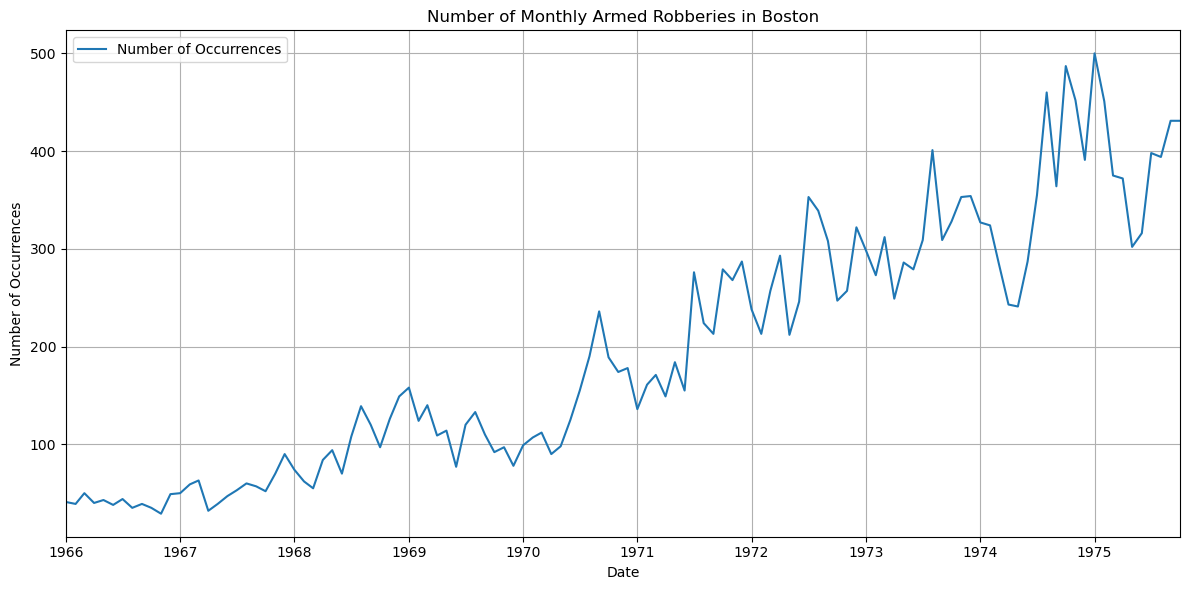

In [5]:
# Plot actual and fitted serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Rob'], label='Number of Occurrences')     

plt.title('Number of Monthly Armed Robberies in Boston')                      
plt.xlabel('Date')                                        
plt.ylabel('Number of Occurrences')  
plt.xlim(pd.to_datetime('1966-01-01'), pd.to_datetime('1975-10-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show();

In [6]:
# Convert to datetime for the comparison
train = df[df.index < pd.to_datetime('1975-01-01')]     # All data before March
test = df[df.index >= pd.to_datetime('1975-01-01')]     # All data in March and beyond

# Show the results
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print()
train.tail(), print(), test.head()

Train shape: (108, 1)
Test shape: (10, 1)




(            Rob
 Month          
 1974-08-01  460
 1974-09-01  364
 1974-10-01  487
 1974-11-01  452
 1974-12-01  391,
 None,
             Rob
 Month          
 1975-01-01  500
 1975-02-01  451
 1975-03-01  375
 1975-04-01  372
 1975-05-01  302)